# **Prediction of carbon footprints from country-specific data**

## Stage 2: Data visualization and EDA

**Input:** cleaned dataset from the csv data file (output of Stage 1 of the project)

**Output:** plots, visualizations, summaries, trends, insights, conclusions

**Programming language:** Python 3.7

**Libraries used:** seaborn, matplotlib, pandas, numpy

**About this notebook**
      In this notebook, I have imported the cleaned dataset and performed exploratory data analysis to see how different variables taken are depenedent on the co2 emissions which is another name for carbon footprints.

# **1. Notebook setup**

Importing all the necessary libraries.

In [ ]:
# import all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import the cleaned dataset from a csv file
data = pd.read_csv('data_cleaned.csv')

# **2. Data overview**

A global overview of the imported data yields the following insights

In [ ]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(923, 17)

In [ ]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


country                 object
year                     int64
co2_kt                 float64
co2_per_gdp            float64
cereal_yield           float64
fdi_perc_gdp           float64
elec_access_perc       float64
ch4_ttl                float64
n2o_ttl                float64
urb_pop_growth_perc    float64
pop_growth_perc        float64
gdp                    float64
gni_per_cap            float64
pop                      int64
urb_pop                  int64
agr_land               float64
co2_per_cap            float64
dtype: object

In [ ]:
# sorting the rows by year and country

data = data.sort_values(by=['year', 'country'])

In [ ]:
print("first 5 rows:")
data.head()

first 5 rows:


,country,year,co2_kt,co2_per_gdp,cereal_yield,fdi_perc_gdp,elec_access_perc,ch4_ttl,n2o_ttl,urb_pop_growth_perc,pop_growth_perc,gdp,gni_per_cap,pop,urb_pop,agr_land,co2_per_cap
863,ARE,2000,84729.1,0.275155,17504.7,-0.485282,100.000000,27691.02500,895.83240,6.112729,5.580387,1.043374e+11,30050.0,3275333,2627996,7.702056,25.868851
0,ARG,2000,132265.5,0.309098,3461.8,3.665791,95.680473,119811.10500,38831.57760,1.346647,1.133277,2.842038e+11,7430.0,37070774,33045629,46.958187,3.567918
20,AUS,2000,339422.8,0.672571,2107.3,3.581377,100.000000,165945.06270,98386.78327,0.984334,1.144473,4.158450e+11,21280.0,19028802,16028911,59.288104,17.837318
400,BEL,2000,117274.6,0.411661,8021.4,37.475312,100.000000,12136.78323,7694.74207,0.308431,0.242518,2.367925e+11,25890.0,10251250,9956937,45.891678,11.440029
380,BGD,2000,20686.7,0.101708,3384.4,0.525362,32.000000,70956.84134,19647.05865,3.563967,1.905524,5.336979e+10,430.0,129193327,30476706,72.213260,0.160122


In [ ]:
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,year,co2_kt,co2_per_gdp,cereal_yield,fdi_perc_gdp,elec_access_perc,ch4_ttl,n2o_ttl,urb_pop_growth_perc,pop_growth_perc,gdp,gni_per_cap,pop,urb_pop,agr_land,co2_per_cap
count,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,9.230000e+02,923.000000,9.230000e+02,9.230000e+02,923.000000,923.000000
mean,2009.560130,5.469666e+05,0.267883,4690.148321,3.116272,89.049168,1.204662e+05,43937.256397,1.873152,1.226301,1.167162e+12,20449.003250,1.158330e+08,6.028536e+07,39.864163,6.075257
std,5.771819,1.391286e+06,0.189047,3529.687799,5.992425,20.707493,2.069728e+05,83339.494097,1.732849,1.431216,2.606037e+12,21792.141454,2.584430e+08,1.130728e+08,21.403371,5.128013
min,2000.000000,1.633000e+03,0.055583,226.100000,-36.140347,10.219621,5.274696e+02,369.198526,-4.980317,-5.280078,3.349170e+09,110.000000,3.308150e+05,3.099740e+05,2.693886,0.053064
25%,2005.000000,4.832270e+04,0.145359,2747.850000,0.931483,88.789100,1.573101e+04,6045.718355,0.802616,0.482827,1.281455e+11,2390.000000,1.262752e+07,7.123984e+06,21.225045,1.614102
50%,2010.000000,1.549175e+05,0.222712,4004.200000,2.101793,99.900000,4.746880e+04,19567.497760,1.500849,1.013722,3.343370e+11,10180.000000,4.156352e+07,2.811489e+07,42.507696,5.538855
75%,2015.000000,3.960266e+05,0.320044,6171.950000,3.701100,100.000000,9.524770e+04,40398.820895,2.658842,1.734059,1.052957e+12,37845.000000,1.011211e+08,5.264920e+07,53.933677,8.565889
max,2019.000000,1.076282e+07,1.562937,36761.900000,86.479149,100.000000,1.163215e+06,551682.723500,18.580685,18.127984,2.138098e+13,105070.000000,1.407745e+09,8.489829e+08,80.888475,28.138659


### Used feature/column abbreviations

| Variable name | Description | Units |
| --------------- | --------------- | --------------- |
| co2_kt    | CO2 emissions, total    | KtCO2    |
| co2_per_gdp    | CO2 emissions per units of GDP    | kg/$1,000 per GDP  |
| cereal_yield   | Cereal yield   | kg per hectare   |
| fdi_perc_gdp    | Foreign direct investment, net inflows    | % of GDP    |
| elec_access_perc    | Access to electricity    | % of population    |
| ch4_ttl   | Methane emissions    | ktCO2    |
| n02_ttl    | Nitrous Oxide emissions    | KtCO2    |
| urb_pop_growth_perc    | Urban population growth    | annual %   |
| pop_growth_perc   | Population growth    | annual %    |
| gdp    | GDP   | USD    |
| gni_per_cap    | GNI per capita    | USD    |
| pop   | Population   | 1    |
| urb_pop    | Urban population    | 1    |
| agr_land    | Agricultural land    | %   |
| co2_per_cap   | CO2 emissions per capita    | metric tons  |



The data series available can be summarized into the following country-specific parameter categories:

*   various emissions of greenhouse gases such as CO2, CH4, N2O, others
*   population-specific parameters: population count, urban population, population growth
*   country economic indicators: GDP, GNI
*   land-related parameters: cereal yield, agricultural land, terrestrial protected areas
*   energy use

# **3. Feature Engineering**

The available columns reveal that the features representing CO2 emissions and energy use have three different reference values:

*   per capita: co2_per_cap, gni_per_cap
*   per unit of GDP: co2_per_gdp, fdi_perc_gdp



In [ ]:
# select all features
col_names_list = data.columns.tolist()
print(col_names_list)
features_all = data[col_names_list]


['country', 'year', 'co2_kt', 'co2_per_gdp', 'cereal_yield', 'fdi_perc_gdp', 'elec_access_perc', 'ch4_ttl', 'n2o_ttl', 'urb_pop_growth_perc', 'pop_growth_perc', 'gdp', 'gni_per_cap', 'pop', 'urb_pop', 'agr_land', 'co2_per_cap']


<ipython-input-9-6f737885fb8b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(features_all.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)


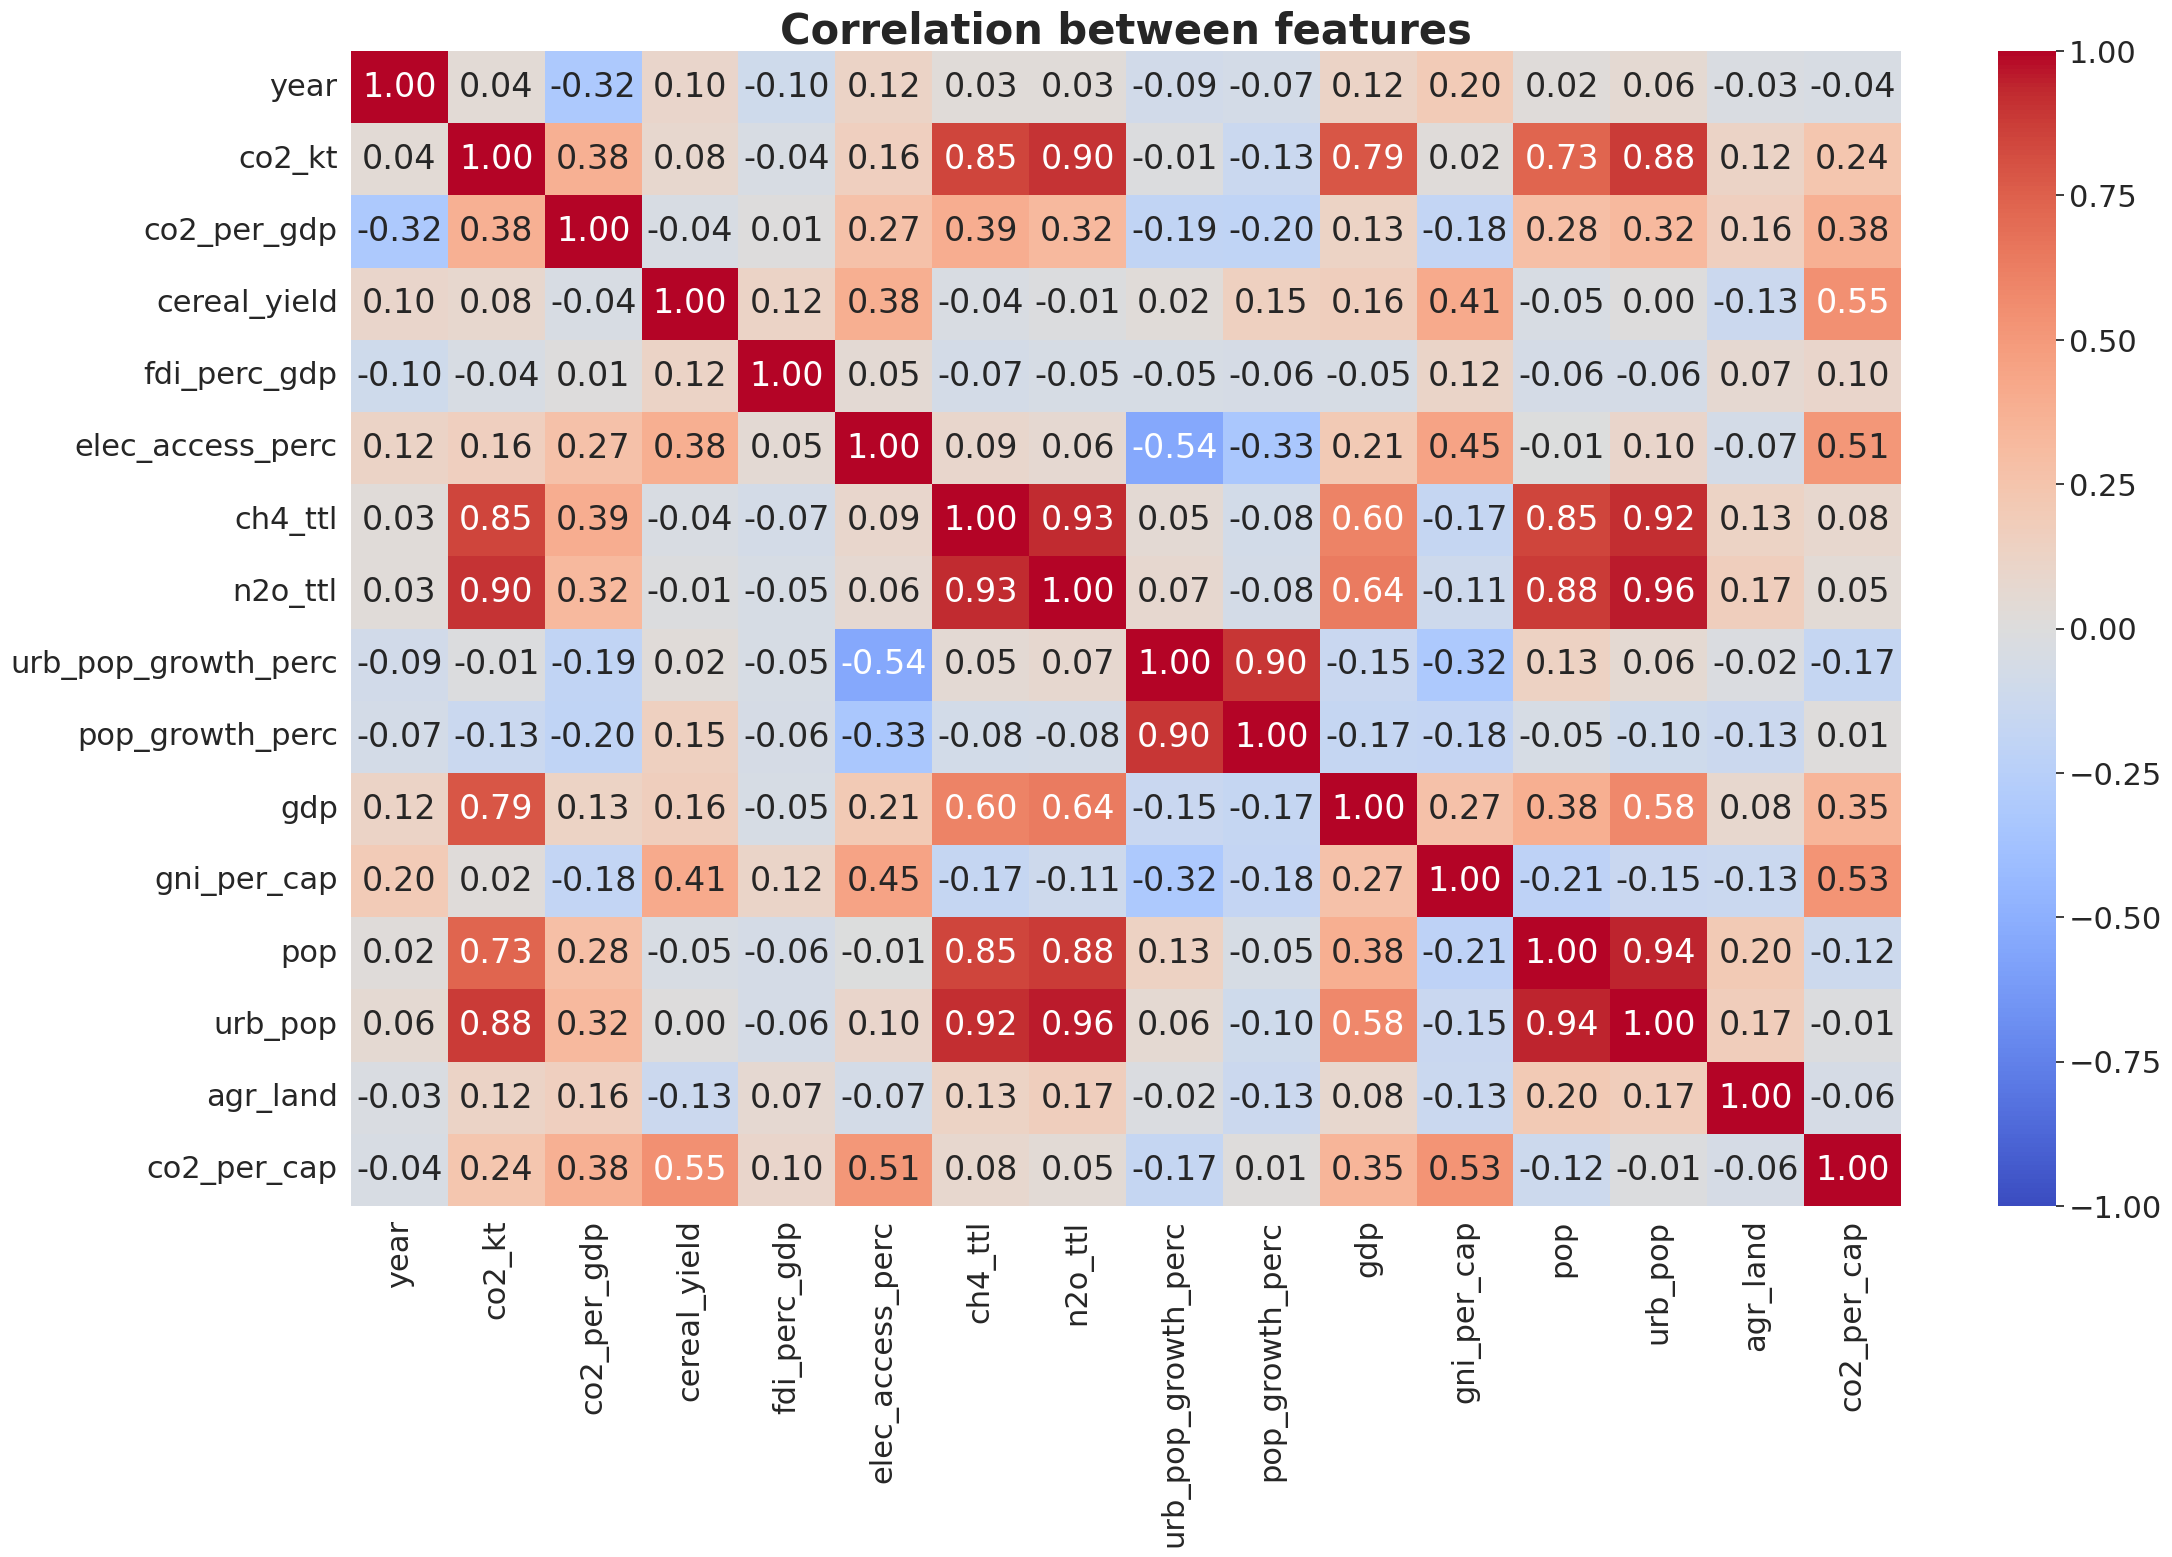

In [ ]:

# plot a correlation of all features
# correlation matrix
sns.set(font_scale=2)
f,ax=plt.subplots(figsize=(25,15))
sns.heatmap(features_all.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=30, weight='bold' )
plt.show()

sns.set(font_scale=1)

When examining the relationships of co2_kt, co2_per_cap, and co2_per_gdp with other features, co2_kt exhibits a stronger correlation with a larger number of variables.
Moreover, co2_kt provides a more representative measure of CO2 emissions, as it takes into account the population size, making it suitable for analyzing and comparing emissions across countries with varying sizes and population counts independently.

Henceforth, the features pop, co2_per_gdp, co2_cap, cereal_yield will be removed from further analysis.

In [ ]:
features = features_all[['country', 'co2_kt', 'fdi_perc_gdp', 'elec_access_perc', 'ch4_ttl', 'n2o_ttl', 'urb_pop_growth_perc', 'pop_growth_perc', 'gdp', 'gni_per_cap', 'urb_pop', 'agr_land']]

# **3. Exploratory Data Analysis (EDA)**

### 3.1 Visualizations

In [ ]:
# a dictionary with feature labels
labels_dict = {'co2_kt': 'CO2 emissions [kt]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'elec_access_perc': 'Access to Electricity(%)',
               'ch4_ttl': 'Methane emissions [kt CO2]',
               'n2o_ttl': 'Nitrous Oxide emissions [kt CO2]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'gdp': 'Gross Domestic Product [$]',
               'gni_per_cap': 'GNI per capita [Atlas $]',
               'urb_pop': 'Urban population [1]',
               'agr_land': 'Agricultural land [%]'}

countries_list = data['country'].unique()
print("countries list: ", countries_list)

features_chosen = features[features['country'].isin(countries_list)]


countries list:  ['ARE' 'ARG' 'AUS' 'BEL' 'BGD' 'BRA' 'CHE' 'CHL' 'CHN' 'CMR' 'COL' 'DEU'
 'DNK' 'EGY' 'ESP' 'ETH' 'FIN' 'FRA' 'GBR' 'IDN' 'IND' 'IRQ' 'ITA' 'JPN'
 'KOR' 'LKA' 'MEX' 'MYS' 'NAM' 'NGA' 'NLD' 'NOR' 'NPL' 'NZL' 'PAK' 'PHL'
 'POL' 'PRT' 'RUS' 'SAU' 'SWE' 'UKR' 'USA' 'ZAF' 'ZMB' 'LBY' 'ISL']


In [ ]:
features_chosen_01 = features[features['country'].isin(countries_list)]

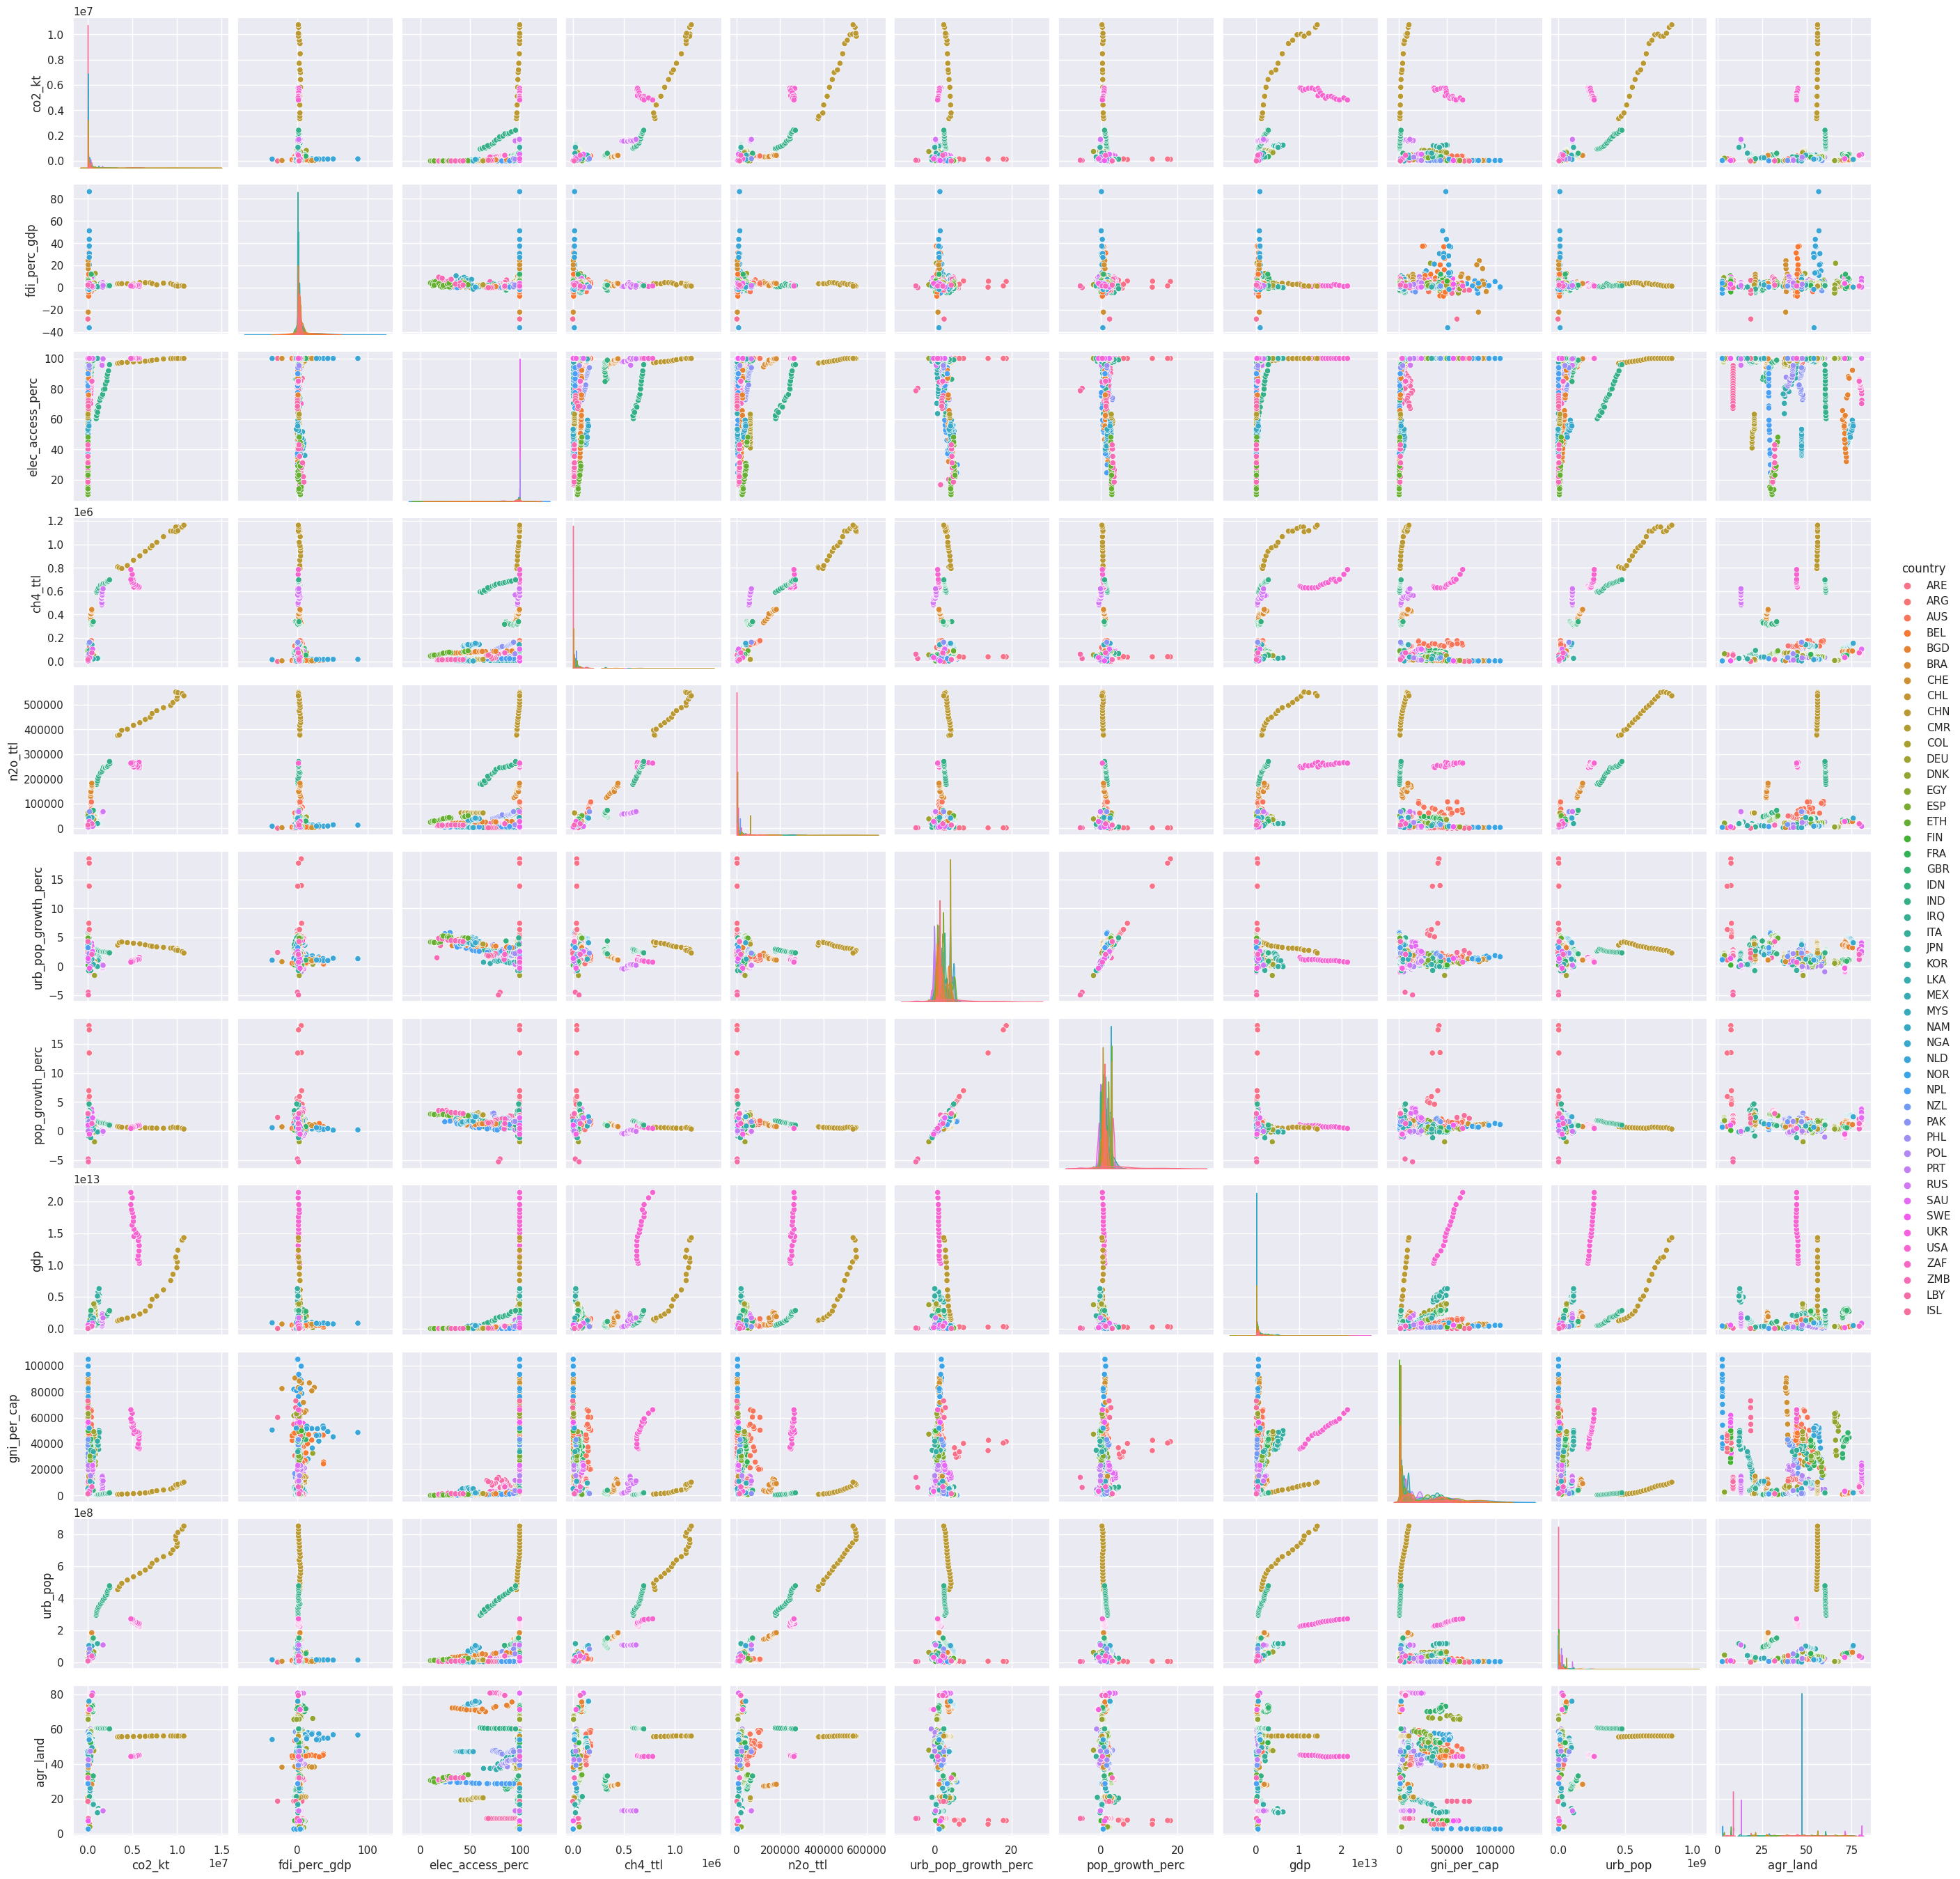

In [ ]:
sns.set(font_scale=1.0)
sns.pairplot(data=features, hue='country')

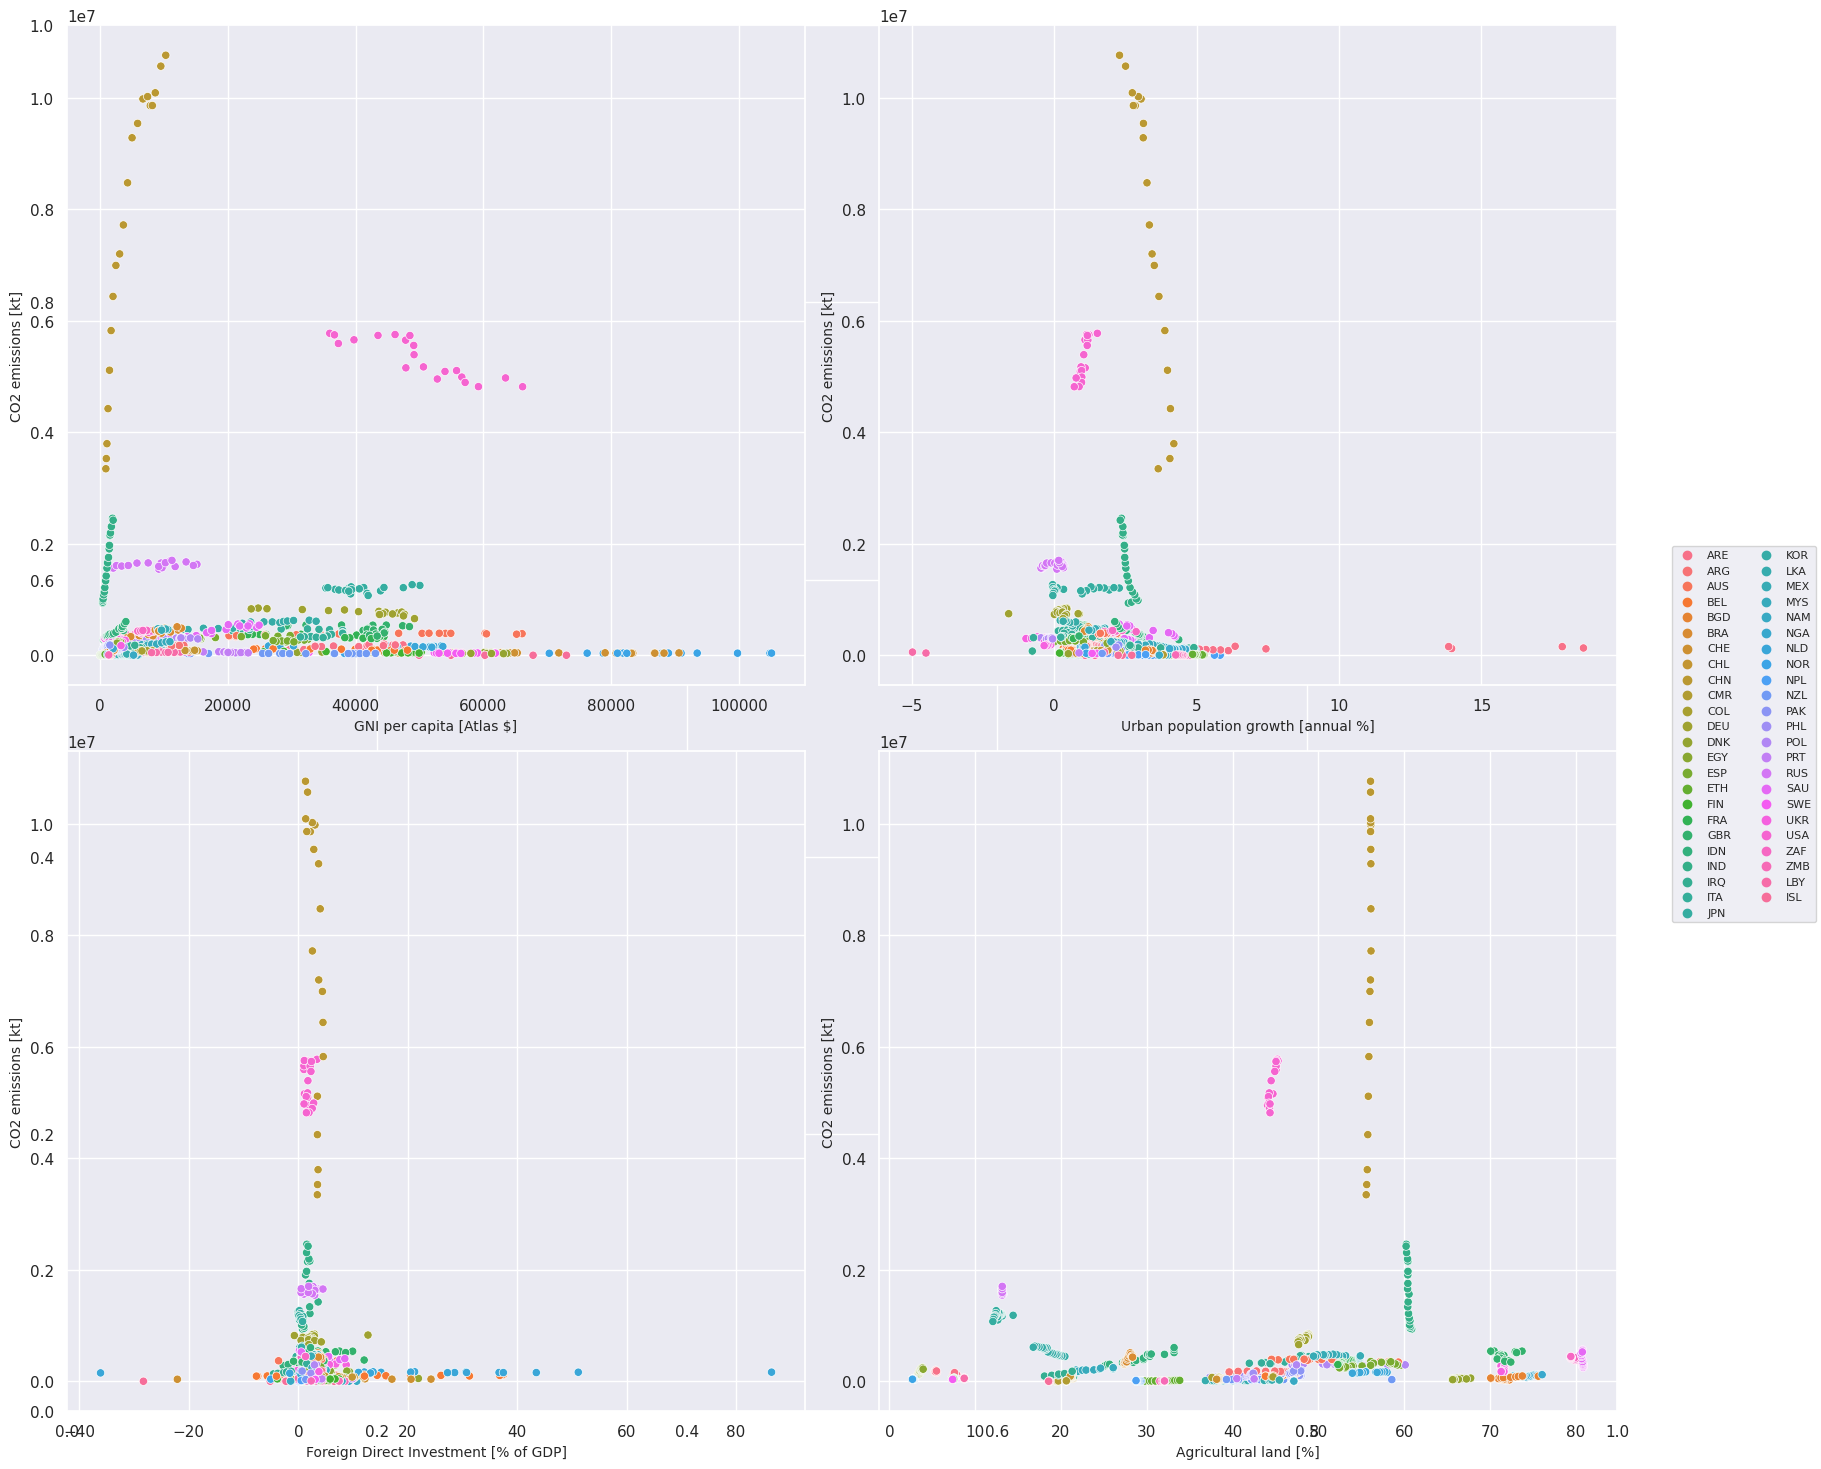

In [ ]:
# set default settings of the seaborn library
sns.set()

# plot all scatterplots

fig,ax=plt.subplots(figsize=(20,18))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1


# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=1)

for [col, label] in [['gni_per_cap',labels_dict['gni_per_cap']], ['urb_pop_growth_perc',labels_dict['urb_pop_growth_perc']], ['fdi_perc_gdp',labels_dict['fdi_perc_gdp']], ['agr_land',labels_dict['agr_land']]]:

    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_kt", data=features, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=10)
    ax.set_ylabel(labels_dict['co2_kt'], fontsize=10)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=8)
plt.show()

Text(43.706614583333334, 0.5, 'CO2 emissions [kt]')

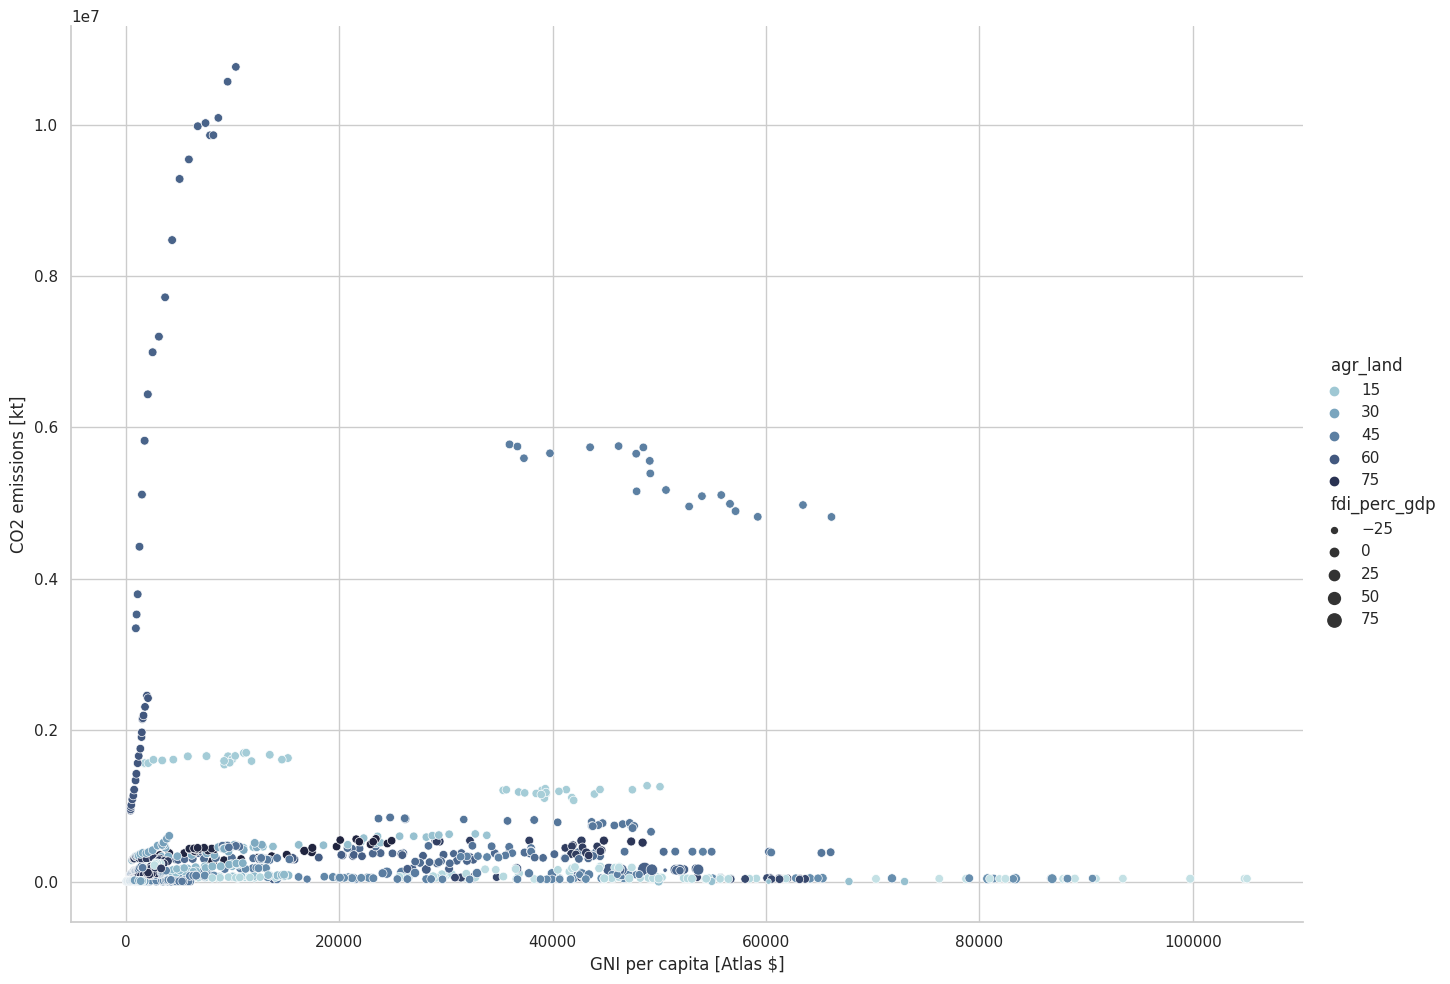

In [ ]:
# 4d plot

sns.set(style="whitegrid", font_scale=1)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features,
    x="gni_per_cap", y="co2_kt",
    hue="agr_land", size="fdi_perc_gdp",
    palette=cmap, sizes=(10, 100),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dict['gni_per_cap'])
g.ax.set_ylabel(labels_dict['co2_kt'])

In [ ]:
# latest_data = data[data['year']==2019]
latest_data = data
print(latest_data.shape)
latest_data.head()


(923, 17)


,country,year,co2_kt,co2_per_gdp,cereal_yield,fdi_perc_gdp,elec_access_perc,ch4_ttl,n2o_ttl,urb_pop_growth_perc,pop_growth_perc,gdp,gni_per_cap,pop,urb_pop,agr_land,co2_per_cap
863,ARE,2000,84729.1,0.275155,17504.7,-0.485282,100.000000,27691.02500,895.83240,6.112729,5.580387,1.043374e+11,30050.0,3275333,2627996,7.702056,25.868851
0,ARG,2000,132265.5,0.309098,3461.8,3.665791,95.680473,119811.10500,38831.57760,1.346647,1.133277,2.842038e+11,7430.0,37070774,33045629,46.958187,3.567918
20,AUS,2000,339422.8,0.672571,2107.3,3.581377,100.000000,165945.06270,98386.78327,0.984334,1.144473,4.158450e+11,21280.0,19028802,16028911,59.288104,17.837318
400,BEL,2000,117274.6,0.411661,8021.4,37.475312,100.000000,12136.78323,7694.74207,0.308431,0.242518,2.367925e+11,25890.0,10251250,9956937,45.891678,11.440029
380,BGD,2000,20686.7,0.101708,3384.4,0.525362,32.000000,70956.84134,19647.05865,3.563967,1.905524,5.336979e+10,430.0,129193327,30476706,72.213260,0.160122


In [ ]:
region_data = pd.read_csv('metadata_country.csv')
region_data.rename(columns={'Country Code': 'country'}, inplace=True)
region_data = region_data[['country','Region','IncomeGroup']]
region_data.head()

,country,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFE,NaN,NaN
2,AFG,South Asia,Low income
3,AFW,NaN,NaN
4,AGO,Sub-Saharan Africa,Lower middle income


In [ ]:
region_data.shape

(265, 3)

In [ ]:
cols = ['Region', 'IncomeGroup']
merged_data = pd.merge(latest_data, region_data, on='country', how = 'left')
merged_data = merged_data.drop_duplicates()
print(merged_data.shape)
merged_data.head()
merged_data.columns.tolist()

(923, 19)


['country',
 'year',
 'co2_kt',
 'co2_per_gdp',
 'cereal_yield',
 'fdi_perc_gdp',
 'elec_access_perc',
 'ch4_ttl',
 'n2o_ttl',
 'urb_pop_growth_perc',
 'pop_growth_perc',
 'gdp',
 'gni_per_cap',
 'pop',
 'urb_pop',
 'agr_land',
 'co2_per_cap',
 'Region',
 'IncomeGroup']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
merged_data.to_csv('merged_data.csv', index=False)

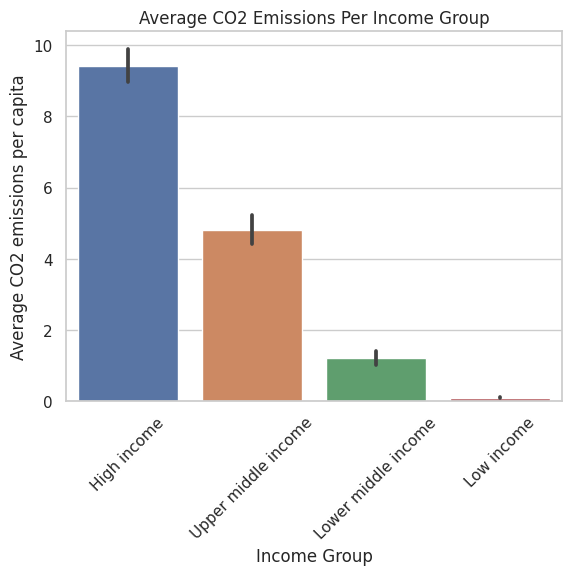

In [ ]:
sns.barplot(x='IncomeGroup', y='co2_per_cap', data=merged_data)
plt.xlabel('Income Group')
plt.ylabel('Average CO2 emissions per capita')
plt.title('Average CO2 Emissions Per Income Group')
plt.xticks(rotation=45)
plt.show()

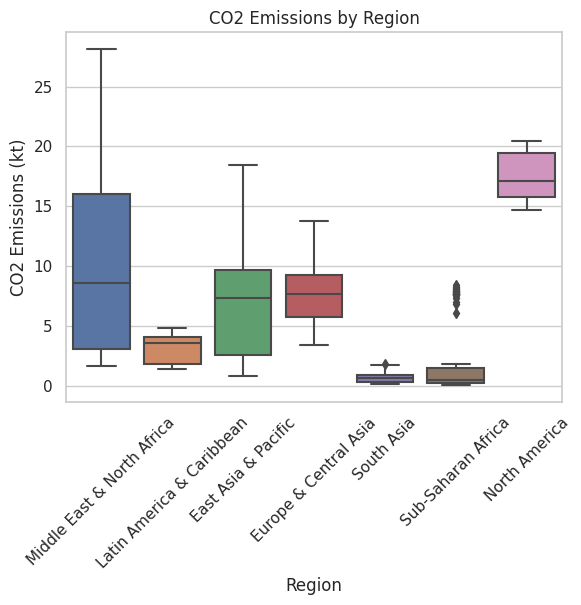

In [ ]:
sns.boxplot(x='Region', y='co2_per_cap', data=merged_data)
plt.xlabel('Region')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions by Region')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame
df = merged_data
regions_abb = df['Region'].unique()
regions_abb

array(['Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'Europe & Central Asia', 'South Asia',
       'Sub-Saharan Africa', 'North America'], dtype=object)

In [ ]:
region_abbreviations = {
    'Middle East & North Africa': 'Africa',
    'Latin America & Caribbean': 'South America',
    'East Asia & Pacific': 'APAC',
    'Europe & Central Asia': 'Europe',
    'Sub-Saharan Africa': 'Africa',
    'South Asia': 'APAC',
    'North America': 'North America',
}
df['RegionAbbrev'] = df['Region'].map(region_abbreviations)

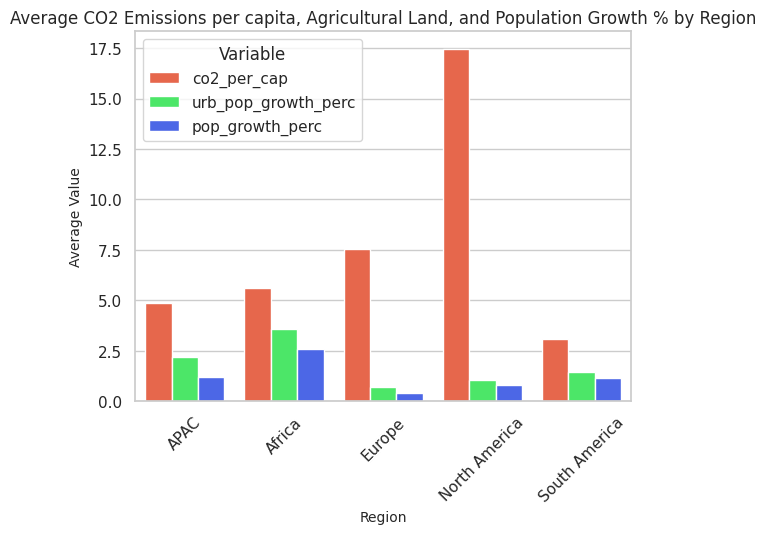

In [ ]:
from numpy.ma import size
custom_palette = ['#FF5733', '#33FF57', '#3357FF']



# Calculate average values of 'co2_kt', 'agr_land', and 'pop_growth_perc' for each region
region_avg = df.groupby('RegionAbbrev')[[ 'co2_per_cap', 'urb_pop_growth_perc', 'pop_growth_perc']].mean().reset_index()

# Melt the DataFrame to create a bar plot
region_avg_melted = region_avg.melt(id_vars='RegionAbbrev', var_name='Variable', value_name='Average Value')

# Create a bar plot
sns.barplot(x='RegionAbbrev', y='Average Value', hue='Variable', data=region_avg_melted, palette=custom_palette)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Average Value', fontsize=10)
plt.title('Average CO2 Emissions per capita, Agricultural Land, and Population Growth % by Region')
plt.xticks(rotation=45)
plt.legend(title='Variable')
plt.show()

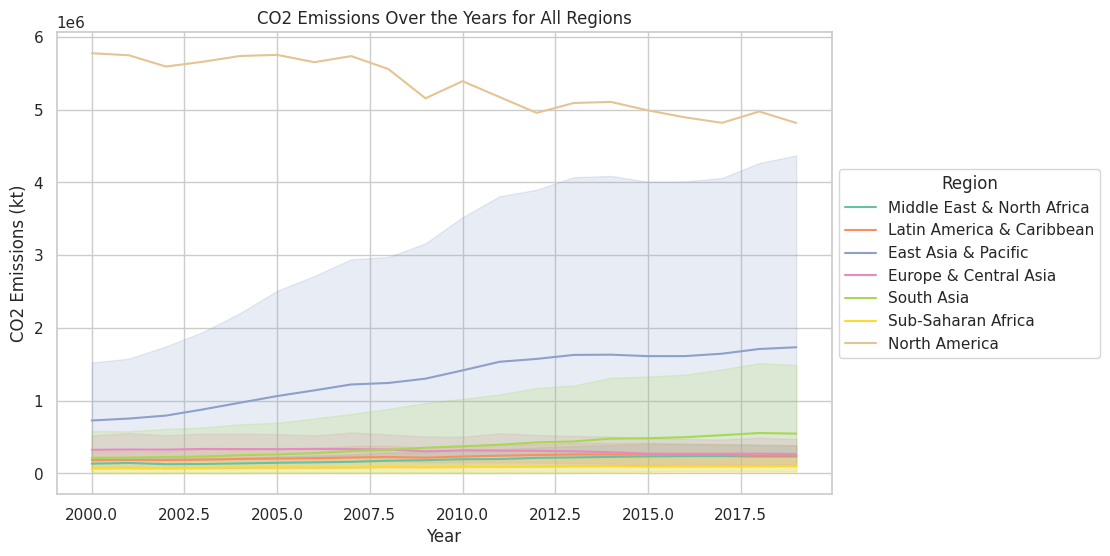

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='co2_kt', hue='Region', data=df, palette='Set2')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions Over the Years for All Regions')
plt.legend(title='Region', loc='center left', bbox_to_anchor=(1, 0.5))  # Move the legend outside the plot area
plt.grid(True)
plt.show()

# **Visualization Conclusions**

The following insights have been observed from the plotting the dataset in different ways:

*   The variables associated with CO2 emissions and energy use, will be subjected to further investigation due to their connections with other features. These variables have been selected for detailed analysis.
*   Distinct groups of outliers, each associated with specific countries, have been identified. Among these groups, the most prominent one is linked to the China (country code CHN). This observation is crucial when selecting data for the predictive analysis, as it indicates that the data series from China significantly deviates from the global trends.

*   The prevalent nonlinear nature of most dependencies and the clustering of data points in specific countries provide valuable insights when considering machine learning algorithms for the predictive analysis. Instead, it suggests favoring algorithms capable of handling nonlinearities and clustered points effectively, such as Random Forest, which are better suited to capture the complexities present in the data and offer more accurate predictions.


